# K-means-clustering algorithm

K-means-clustering is an algorithm is a popular clustering algorithm usually used to group common elements using clusters.

## Global imports

In [4]:
import numpy as np
from load_mat import load_mat
from matplotlib import pyplot as plt

## Loading dataset

Matlab file ***'ex7data2.mat'*** located inside **data** directory contains matrix of size 300x2. It contains 300 example elements that will be used for visualization and later calculations. 

In [1]:
from load_mat import load_mat

x = load_mat('./data/ex7data2.mat', 'X')

## Visualize dataset

**x** matrix contains X and Y position so visualizing data in 2D plot is straightforward.

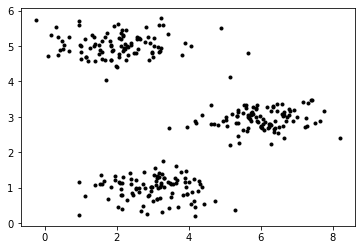

In [3]:
from plot_data import plot_data

plot_data(x)

## Manually select initial centroids 

Firstly, let's select 'manually' potential centroids locations.

In [7]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

## Find closest centroid

As a first step, we will find the closest centroid for each row in matrix x.

The code is rather simple - it iterates through every row in X and every row in centroids matrix and check which centroid is the closest one.

Essentially, the code for calculating the distance between two points is the following:

\begin{align}
||a|| = \sqrt{\sum^{n}_{k=1}(X^{(k)} - Y^{(k)})^2}
\end{align}

Where *k* indicates the *feature* of X (i.e. position), n indicating number of *features* and Y is the matrix representing the position of the centroid.

In [8]:
def find_closest_centroids(x, centroids):
    dist_centroids = np.zeros((np.shape(x)[0], 1))
    for i in range(0, np.shape(x)[0]):
        num_of_centroids = np.shape(centroids)[0]
        closest_centroids = np.zeros((num_of_centroids, 1))
        for j in range(0, num_of_centroids):
            x_el_pos = x[i, :]
            curr_centroid_pos = centroids[j, :]
            closest_centroids[j] = np.sqrt(np.sum((curr_centroid_pos - x_el_pos) ** 2))
        dist_centroids[i] = np.argmin(closest_centroids)
    return dist_centroids

## Compute centroids

The whole idea of centroids bases on *moving* the centroid to recalculate the position of the centroid using the mean of the points.

The following function will take 2 parameters - matrix x, dist_centroids - indicating centroids closest to each of the points and number of centroids.

In [9]:
def compute_centroids(x, dist_centroids, num_of_centroids):
    centroids = np.zeros((num_of_centroids, np.shape(x)[1]))
    for i in range(0, num_of_centroids):
        x_indexes = np.where(dist_centroids == i)
        x_points = x[x_indexes[0], :]
        x_points_len = np.size(x_points, 0)
        x_mean = np.divide(np.sum(x_points, 0), x_points_len)
        centroids[i, :] = x_mean
    return centroids

# Recalculate centroids position

Idea behind K-means-clustering is that all centroids should move for each re-computation of the x points' means.

The following function will repeat calculations few times to find best spot for each centroid.

It will also show the progress that each centroid made, which helps visualize the progress.

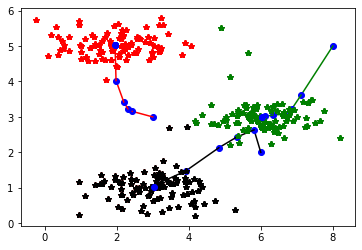

In [7]:
from find_closest_centroids import find_closest_centroids
from compute_centroids import compute_centroids

x = load_mat('./data/ex7data2.mat', 'X')
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
max_iters = 10
centroids = initial_centroids
past_centroids = centroids


def get_color(i):
    return {
        0: "r",
        1: "k",
        2: "g"
    }.get(i)


def draw_progress(centroids, past_centroids):
    for i in range(0, np.size(centroids, 0)):
        plt.plot([centroids[i, :][0], past_centroids[i, :][0]], [centroids[i, :][1], past_centroids[i, :][1]],
                 c=get_color(i))


def plot_x_groups(x, idx):
    for i in range(0, int(np.max(idx)) + 1):
        x_group_indices = np.where(idx == i)
        x_group = x[x_group_indices[0], :]
        plt.plot(*zip(*x_group), marker="*", linestyle="None", c=get_color(i))


plt.plot(*zip(*past_centroids), 'ob')

for i in range(0, max_iters):
    idx = find_closest_centroids(x, centroids)
    past_centroids = centroids
    centroids = compute_centroids(x, idx, 3)
    plot_x_groups(x, idx)
    draw_progress(centroids, past_centroids)
    plt.plot(*zip(*centroids), 'ob')

## Scikit usage

The same code can be replaced with just few lines of code by using ML library SciKit and its implementation of K-means-clustering.

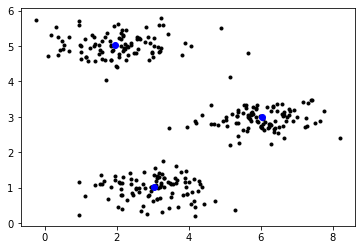

In [12]:
from sklearn.cluster import KMeans
from plot_data import plot_data

def calc_centroids(x):
    kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
    centroids = kmeans.cluster_centers_
    return centroids

calc_centroids = calc_centroids(x)
plot_data(x)
plt.plot(*zip(*calc_centroids), 'ob')